In [254]:
import pandas as pd
import numpy as np
import json
from pandas import DataFrame
from pandas.io.json import json_normalize
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import nltk
import string
import re
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import stopwords
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [255]:
df = pd.read_excel("/home/surya/Nightingale_Chat_NEW.xlsx",sheet_name = "All", header=0)
print(df.rating.value_counts())
# df.columns

high      2033
medium    1880
low       1485
Name: rating, dtype: int64


In [256]:
len(df) , len(df.drop_duplicates())

(5398, 5398)

In [257]:
df = df.drop_duplicates()

In [260]:
# Hello John, 

In [261]:
print(pd.concat([df.head(), df.tail()]))

                                           patient_chat rating
0     female, 55 years, 75 kg and obese. hypertensiv...   high
1     I'm 22 and male and I have gotten terrible mig...   high
2     My wife is constantly suffering from high bloo...   high
3     I get head aches multiple time times a week I'...   high
4     I recently suffered a substantial loss of belo...   high
5393   Hello John, how are you doing today? What can...    low
5394   Hello John, how are you doing today? What can...    low
5395   Hello John, how are you doing today? What can...    low
5396   Hello John, how are you doing today? What can...    low
5397   Hello John, how are you doing today? What can...    low


In [262]:
stop_words = set(stopwords.words('english'))
discard_words = {'not' , 'no'}
stop_words = stop_words - discard_words

In [263]:
type(stop_words)
print(stop_words)

{'as', 'yourselves', 'its', 'doing', 'against', 'in', 'his', 'down', 'each', 'it', 'them', 'what', 'just', 'needn', 'had', 'once', 'her', 'isn', 'at', 'was', 'yours', 'most', "you'd", "aren't", 'itself', 'but', 'after', 'm', 'there', 'with', 'on', 'me', 'any', "she's", "mightn't", 'ours', 'through', "weren't", 'the', 'because', 'only', "couldn't", 'does', 'won', 'did', 'until', 'should', 'he', 'be', 'very', 'their', "should've", "mustn't", 'o', 'hers', 'haven', 'you', 'am', 'for', "hasn't", 'few', 'is', 'yourself', 'ma', 'and', 'will', 'above', 'shouldn', 'by', 're', "you'll", 'your', 'over', 'again', 'own', 'about', "wouldn't", 'him', 'of', 'weren', 'such', 'has', 'some', 'mustn', 'more', 'y', 'himself', 'ain', 'now', 'to', 'have', "won't", "you're", 'when', 'are', 've', 'do', 'why', 'we', 'couldn', 'my', 'ourselves', "it's", 'below', 'd', 'theirs', 'during', 'from', 'who', 'whom', 'here', 'herself', 'being', 'themselves', 'so', 'up', 'how', 'while', 'she', 'they', 'then', "that'll", 

In [264]:
def load_file(filename):
    with open(filename) as f:
        d = json.load(f)
        df = DataFrame(d)
        f.close()
    return df

punc_ = set(string.punctuation)

In [265]:
def clean_document(doc) :
    
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stop_words = set(stopwords.words('english'))
    doc = doc.replace("Hello John,", "")
    tokens = doc.lower().split()
    
#     tokens = [w for w in tokens if '@' not in w]
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha() or word.isalnum()]
    stop_words = set(stopwords.words('english'))
    #remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in punc_]
    tokens = [re.sub('[^A-Za-z0-9]+', '', word)  for word in tokens]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

def preprocess_documents(docs):
    clean_docs = [clean_document(doc) for doc in docs]
    return clean_docs

In [266]:
docs = list(df.patient_chat)
clean_docs = preprocess_documents(docs)

## Define Vocobulary

In [271]:
vocab = Counter()

# load doc and add to vocab
def add_doc_to_vocab(doc,vocab):
    vocab.update(doc)
    return vocab

# load all docs in a directory
def process_docs(clean_docs, vocab):
    for doc in clean_docs:
        vocab = add_doc_to_vocab(doc, vocab)
    return vocab

vocab = process_docs(clean_docs, vocab)

# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))

2470


### Total Vocobulary : 2470


In [272]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
    
# save tokens to a vocabulary file
save_list(tokens, 'nightingale_vocab.txt')

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load doc, clean and return line of tokens
def doc_to_line(doc, vocab):
    # filter by vocab
    tokens = [w for w in doc if w in vocab]
    return ' '.join(tokens)

In [273]:
!pwd

/home/surya


In [470]:
# !cat /home/surya/nightingale_vocab.txt

In [274]:
!ls -ltr /home/surya/nightingale_vocab.txt

-rw-r--r--. 1 root root 18297 Jun  7 14:50 /home/surya/nightingale_vocab.txt


In [275]:
# load the vocabulary
vocab_filename = 'nightingale_vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [276]:
clean_doc_voc = []
for doc in clean_docs:
    clean_doc_voc.append(doc_to_line(doc, vocab))
    
df["clean_doc_voc"] = clean_doc_voc

In [277]:
df.rating  = df.rating.map({'low':0, 'medium':1, 'high' : 2})

In [278]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
train, test = train_test_split(df[["clean_doc_voc","rating" ]], test_size=0.2)

xtrain_docs , y_train_docs= train["clean_doc_voc"] , train["rating"]
xtest_docs , y_test_docs= test["clean_doc_voc"] , test["rating"]

In [279]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [280]:
# encode data
tokenizer = create_tokenizer(xtrain_docs)
Xtrain = tokenizer.texts_to_matrix(xtrain_docs, mode='freq' )
print(len(tokenizer.word_index))
Xtest = tokenizer.texts_to_matrix(xtest_docs, mode='freq')
print(len(tokenizer.word_index))

2412
2412


In [473]:
xtrain_docs[0]

'female 55 years 75 kg obese hypertensive 160110 hg doctor prescribes olmesartan suffering severe headache'

In [472]:
Xtrain[0]

array([ 23,   8, 250, 219,  12,  63,  14,   1,  19,  20,  18,  58,  56,
         1,   5,   2,  22,   3,  13,  26,   3,   9,   7,   6,  10, 132,
         7,  21,  15,  25,  24,   3,   2,  11,  16,  17,  12,   3,   2,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0], dtype=int32)

In [281]:
len(tokenizer.word_index)

2412

In [282]:
print((Xtrain.shape ,y_train_docs.shape))
print((xtest_docs.shape, y_test_docs.shape))

((4318, 2413), (4318,))
((1080,), (1080,))


In [283]:
len(set(tokenizer.word_index))

2412

In [284]:
y_train_docs[:4]

3826    2
697     0
4572    1
4905    0
Name: rating, dtype: int64

In [285]:
n_words = Xtest.shape[1]
n_words

2413

In [286]:
Xtrain.shape[1]

2413

In [474]:
# MLP - Multi Layer perceptron models

In [475]:
n_words

2413

In [315]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model
print(n_words)
model = define_model(n_words)
print(len(set(vocab)))

2413
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_114 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
2470


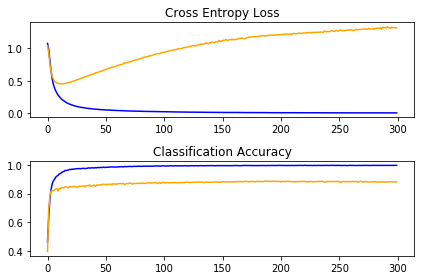

In [313]:
# fit network
history = model.fit(Xtrain, to_categorical(y_train_docs), epochs=300, validation_data=(Xtest, to_categorical(y_test_docs)),
          verbose=0 , )
histories = []
histories.append(history)

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        pyplot.tight_layout()
        pyplot.legend()
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['acc'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
        pyplot.tight_layout()
        
    pyplot.show()
    
summarize_diagnostics(histories)

In [ ]:

# # evaluate a model using k-fold cross-validation
# def evaluate_model(model, dataX, dataY, n_folds=5):
# 	scores, histories = list(), list()
# 	# prepare cross validation
# 	kfold = KFold(n_folds, shuffle=True, random_state=1)
# 	# enumerate splits
# 	for train_ix, test_ix in kfold.split(dataX):
# 		# select rows for train and test
# 		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
# 		# fit model
# 		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
# 		# evaluate model
# 		_, acc = model.evaluate(testX, testY, verbose=0)
# 		print('> %.3f' % (acc * 100.0))
# 		# append scores
# 		scores.append(acc)
# 		histories.append(history)
# 	return scores, histories



# # summarize model performance
# def summarize_performance(scores):
# 	# print summary
# 	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# 	# box and whisker plots of results
# 	pyplot.boxplot(scores)
# 	pyplot.show()

# # run the test harness for evaluating a model
# def run_test_harness():
# 	# load dataset
# 	trainX, trainY, testX, testY = load_dataset()
# 	# prepare pixel data
# 	trainX, testX = prep_pixels(trainX, testX)
# 	# define model
# 	model = define_model()
# 	# evaluate model
# 	scores, histories = evaluate_model(model, trainX, trainY)
# 	# learning curves
# 	summarize_diagnostics(histories)
# 	# summarize estimated performance
# 	summarize_performance(scores)

In [316]:
!ls -ltr *.h5

-rw-r--r--. 1 root root  7040824 May 14 16:58 model_98.h5
-rw-r--r--. 1 root root 20628648 May 14 18:21 model.h5
-rw-r--r--. 1 root root 20628648 May 14 18:24 model_multi.h5
-rw-r--r--. 1 root root  2649064 May 20 17:27 model_nightingale.h5
-rw-r--r--. 1 root root 27599320 Jun  3 14:10 model_multi_nightingale_NEW.h5
-rw-r--r--. 1 root root 27286464 Jun  3 15:11 ng_model_model_multiinput.h5
-rw-r--r--. 1 root root 28312120 Jun  6 11:47 ng_model_epch20.h5
-rw-r--r--. 1 root root 28312464 Jun  6 11:51 ng_model_model_multiinput_NEW.h5
-rw-r--r--. 1 root root 28312464 Jun  6 11:51 model_multi_nightingale.h5
-rw-r--r--. 1 root root  1473672 Jun  7 14:54 nightingale_freq.h5


In [317]:
model.save("nightingale_freq.h5")

In [318]:
import pickle

def save_tokenizer_file(object_, filename):
    # saving
    with open(filename, 'wb') as handle:
        pickle.dump(object_, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer_file(filename):
    # loading
    with open(filename, 'rb') as handle:
        tokenizer = pickle.load(handle)
        return tokenizer
    return null
save_tokenizer_file(tokenizer,"tokenizer.pkl")

In [319]:
# evaluate
loss, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 26.018519


In [320]:
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [321]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=100, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [322]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(xtrain_docs, xtest_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, to_categorical(y_train_docs), Xtest, to_categorical(y_test_docs))
    # summarize results
    # Comparing Word Scoring Methods
    print(results.describe())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_116 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.2740740740740741
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_118 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
2 accuracy: 0.2740740740740741
__

3 accuracy: 0.2740740740740741
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_142 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.2740740740740741
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_144 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
5 

6 accuracy: 0.2740740740740741
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_168 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.2740740740740741
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_170 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
8 

9 accuracy: 0.873148148589664
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 50)                120700    
_________________________________________________________________
dense_194 (Dense)            (None, 3)                 153       
Total params: 120,853
Trainable params: 120,853
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.8759259263674418
          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.274074   0.274074   0.274074   0.875370
std     0.000000   0.000000   0.000000   0.004122
min     0.274074   0.274074   0.274074   0.867593
25%     0.274074   0.274074   0.274074   0.873148
50%     0.274074   0.274074   0.274074   0.875926
75%     0.274074   0.274074   0.274074   0.878935
max     0.274074   0.274074   0.274074   0.880556


In [323]:
import matplotlib.pyplot as plt
%matplotlib inline

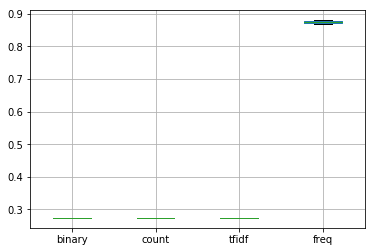

In [324]:
results.boxplot()
plt.show()

###  Predict New Sentiment

In [325]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
#     tokens = clean_doc(review)
    
    tokens = clean_document(text)
    print(tokens)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='freq')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    max_index = np.argmax(yhat[0])
    print(yhat[0])
    print(yhat[0][max_index])
    # retrieve predicted percentage and label
    percent_pos = yhat[0][max_index]
    if max_index == 0 : 
        return (percent_pos), '0'
    if max_index == 1 : 
        return (percent_pos), '1'
    if max_index == 2 : 
        return (percent_pos), '2'
    return "NA"

In [326]:
# test positive text
text = "my leg is getting hell lot of pain whihch is un imaginable blood due to pain!!"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['leg', 'getting', 'hell', 'lot', 'pain', 'whihch', 'un', 'imaginable', 'blood', 'due', 'pain']
[0.5008606  0.5015721  0.49910027]
0.5015721


(0.5015721, '1')

In [327]:
# test positive text
text = "my leg is paining alot and it is severe, couldn't bear any more"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['leg', 'paining', 'alot', 'severe', 'couldnt', 'bear']
[0.50114214 0.4969691  0.50239265]
0.50239265


(0.50239265, '2')

In [328]:
# test positive text
# text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

['leg', 'paining', 'alot', 'severe', 'couldnt', 'bear']
[0.50114214 0.4969691  0.50239265]
0.50239265
Review: [my leg is paining alot and it is severe, couldn't bear any more]
Sentiment: 2 (50.239%)
['bad', 'movie']
[0.49783656 0.5080463  0.49629587]
0.5080463
Review: [This is a bad movie.]
Sentiment: 1 (50.805%)


In [329]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [330]:
len(vocab)

2470

In [331]:
# xtrain_docs

In [332]:
max_length = max([len(s.split()) for s in xtrain_docs])
max_length

105

In [333]:
vocab_size = len(set(vocab))
len(set(vocab))

2470

In [334]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Embedding , Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [335]:
# define modela
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 105, 300)          741000    
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 98, 32)            76832     
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 49, 32)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 42, 32)            8224      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 21, 32)            0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 14, 32)            8224      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 7, 32)             0         
__________

In [336]:
encoded_docs = tokenizer.texts_to_sequences(xtrain_docs)

In [337]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [338]:
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [339]:
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 105, 300)          741000    
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 98, 32)            76832     
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 49, 32)            0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 42, 32)            8224      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 21, 32)            0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 14, 32)            8224      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 7, 32)             0         
__________

In [340]:
len(xtrain_docs) , len(y_train_docs)

(4318, 4318)

In [ ]:
Xtest

In [343]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), 
          epochs=50, verbose=2,
          validation_data=(Xtest, to_categorical(y_test_docs)))
# save the model
# model.save('model_nightingale.h5')

Train on 4318 samples, validate on 1080 samples
Epoch 1/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 2/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 3/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 4/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 5/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 6/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 7/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 8/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 9/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 10/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 11/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 12/50
 - 4s - loss: nan - acc: 0.2754 - val_loss: nan - val_acc: 0.2741
Epoch 13/50
 - 4s - loss:

In [344]:
import pickle

def save_tokenizer_file(object_, filename):
    # saving
    with open(filename, 'wb') as handle:
        pickle.dump(object_, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer_file(filename):
    # loading
    with open(filename, 'rb') as handle:
        tokenizer = pickle.load(handle)
        return tokenizer
    return null

In [345]:
# load the model
from keras.models import load_model
# save the model
model.save('ng_model_epch20.h5')
# model = load_model('model_multi_nightingale.h5')

In [346]:
save_tokenizer_file(tokenizer, 'tokenizer.pkl')
tokenizer = load_tokenizer_file('tokenizer.pkl')
tokenizer

In [347]:
def save_file(data, filename):
    dump(data,filename)
    print('Saved: %s' % filename)

#########################

In [348]:
text = " Hello John,How can I help to you What causes headaches?please let me know Is it a throbbing headache?  How does bending forward affect your headache?  How would you describe the intensity of your headache?  Do you become frustrated or upset easily?  Have you recently used any drugs in any form?  Do you experience day time sleep?  Do you tend to drink alcohol heavily?  Are you feeling agitated and physically restless? "

In [349]:
tokens = clean_document(text)
print(tokens)
# filter by vocab
tokens = [w for w in tokens if w in vocab]
# # convert to line
line = ' '.join(tokens)
line

# # encode
# encoded = tokenizer.texts_to_matrix([line], mode='freq')
# # predict sentiment
# yhat = model.predict(encoded, verbose=0)

['help', 'causes', 'headachesplease', 'let', 'know', 'throbbing', 'headache', 'bending', 'forward', 'affect', 'headache', 'would', 'describe', 'intensity', 'headache', 'become', 'frustrated', 'upset', 'easily', 'recently', 'used', 'drugs', 'form', 'experience', 'day', 'time', 'sleep', 'tend', 'drink', 'alcohol', 'heavily', 'feeling', 'agitated', 'physically', 'restless']


'help causes headachesplease let know throbbing headache bending forward affect headache would describe intensity headache become frustrated upset easily recently used drugs form experience day time sleep tend drink alcohol heavily feeling agitated physically restless'

#########################

In [350]:
max_length

105

In [351]:
enc_docs = encode_docs(tokenizer, max_length, [line])

In [352]:
output_arr = model.predict(enc_docs)
# output_arr[]
print(output_arr)
output_arr.argmax()
output_arr[0][0]

[[nan nan nan]]


nan

In [353]:
# _, acc = model.evaluate([trainX,trainX,trainX],to_categorical(y_train_docs), verbose=2)

In [371]:
Xtrain.shape

(4318, 105)

In [355]:
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)

In [356]:
from pickle import dump
# save a dataset to file
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)
    # load and clean all reviews
#     train_docs, ytrain = load_clean_dataset(True)
#     test_docs, ytest = load_clean_dataset(False)
# save training datasets
save_dataset([Xtrain, to_categorical(y_train_docs)], 'train_nightingale.pkl')
save_dataset([Xtest, to_categorical(y_test_docs)], 'test_nightingale.pkl')   


Saved: train_nightingale.pkl
Saved: test_nightingale.pkl


In [357]:
from pickle import load
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
trainLines, trainLabels = load_dataset('train.pkl')

In [440]:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 300)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 300)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 300)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [441]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2413


In [442]:
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [443]:
trainLines
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [444]:
length = max_length
from numpy import array
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.merge import concatenate
from keras.models import Model

In [445]:
len(trainLabels) , len(xtrain_docs)  , len(y_train_docs)
# len(trainX)

(4318, 4318, 4318)

In [446]:
trainLabels = to_categorical(y_train_docs)

In [447]:
len(y_train_docs) , length

(4318, 105)

In [448]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 105)          0                                            
__________________________________________________________________________________________________
input_38 (InputLayer)           (None, 105)          0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           (None, 105)          0                                            
__________________________________________________________________________________________________
embedding_41 (Embedding)        (None, 105, 300)     723900      input_37[0][0]                   
__________________________________________________________________________________________________
embedding_

In [449]:
testX  = encode_docs(tokenizer, max_length, xtest_docs)

In [450]:
testX.shape

(1080, 105)

In [451]:
trainX.shape

(4318, 105)

In [452]:
from  keras.callbacks import ModelCheckpoint

In [453]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5',
                             verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  


In [455]:
# fit model
history = model.fit([trainX,trainX,trainX], 
                    array(trainLabels),
                    epochs=25,
                    batch_size=1 ,
                    validation_data=([testX,testX,testX],
                                     to_categorical(y_test_docs)) , 
                    callbacks=[checkpoint])

Train on 4318 samples, validate on 1080 samples
Epoch 1/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0291 - acc: 0.9919 - val_loss: 0.9729 - val_acc: 0.8880

Epoch 00001: val_acc did not improve from 0.89352
Epoch 2/25
4318/4318 [==============================] - 77s 18ms/step - loss: 0.0513 - acc: 0.9877 - val_loss: 1.0071 - val_acc: 0.8833

Epoch 00002: val_acc did not improve from 0.89352
Epoch 3/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0313 - acc: 0.9928 - val_loss: 1.2852 - val_acc: 0.8806

Epoch 00003: val_acc did not improve from 0.89352
Epoch 4/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0380 - acc: 0.9919 - val_loss: 1.1620 - val_acc: 0.8787

Epoch 00004: val_acc did not improve from 0.89352
Epoch 5/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0486 - acc: 0.9912 - val_loss: 1.1552 - val_acc: 0.8824

Epoch 00005: val_acc did not improve from 0.89352
Epoch 6/25
4318/4

Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x7f92ed6d5f28>>
Traceback (most recent call last):
  File "/root/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/c_api_util.py", line 39, in __del__
    c_api.TF_DeleteStatus(self.status)
KeyboardInterrupt


4318/4318 [==============================] - 76s 18ms/step - loss: 0.0459 - acc: 0.9917 - val_loss: 0.9167 - val_acc: 0.8750

Epoch 00008: val_acc did not improve from 0.89352
Epoch 9/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0773 - acc: 0.9898 - val_loss: 0.9657 - val_acc: 0.8741

Epoch 00009: val_acc did not improve from 0.89352
Epoch 10/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0334 - acc: 0.9940 - val_loss: 1.1107 - val_acc: 0.8852

Epoch 00010: val_acc did not improve from 0.89352
Epoch 11/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0257 - acc: 0.9942 - val_loss: 1.2924 - val_acc: 0.8769

Epoch 00011: val_acc did not improve from 0.89352
Epoch 12/25
4318/4318 [==============================] - 76s 18ms/step - loss: 0.0518 - acc: 0.9928 - val_loss: 1.5254 - val_acc: 0.8630

Epoch 00012: val_acc did not improve from 0.89352
Epoch 13/25
4318/4318 [==============================] - 77s 18ms/step - 

KeyboardInterrupt: 

In [ ]:
### To Reduce OVerfitting in Above graph

In [462]:
from keras.layers import Bidirectional, LSTM, TimeDistributed

In [465]:
def blstm_model(length, vocab_size):
    # main model
    input = Input(shape=(length,))
    model = Embedding(vocab_size,300,input_length=length)(input)
    model =  Bidirectional (LSTM (300,return_sequences=True,dropout=0.50),merge_mode='concat')(model)
    model = TimeDistributed(Dense(300,activation='relu'))(model)
    model = Flatten()(model)
    model = Dense(200,activation='relu')(model)
    model = Dense(100,activation='relu')(model)
    output = Dense(3,activation='softmax')(model)
    model = Model(input,output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = blstm_model(length, vocab_size)
print(model.summary())

model.fit(trainX,trainLabels,validation_split=0.25, epochs = 20, verbose = 1)

loss, accuracy = model.evaluate(trainX, array(trainLabels), verbose=2)
print('Training Accuracy: %f' % (accuracy*100))

# evaluate the model
loss, accuracy = model.evaluate(testX, to_categorical(y_test_docs), verbose=2)
print('Testing Accuracy: %f' % (accuracy*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, 105)               0         
_________________________________________________________________
embedding_49 (Embedding)     (None, 105, 300)          723900    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 105, 600)          1442400   
_________________________________________________________________
time_distributed_3 (TimeDist (None, 105, 300)          180300    
_________________________________________________________________
flatten_46 (Flatten)         (None, 31500)             0         
_________________________________________________________________
dense_214 (Dense)            (None, 200)               6300200   
_________________________________________________________________
dense_215 (Dense)            (None, 100)               20100     
__________

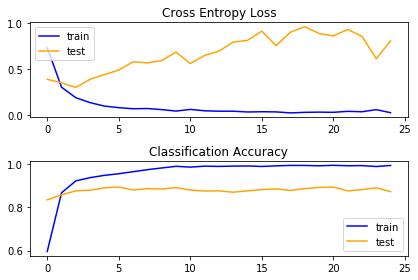

In [467]:
summarize_diagnostics(history)

In [468]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')


NameError: name 'X_test' is not defined

# fit model
history = model.fit([trainX,trainX,trainX],
                    array(trainLabels), 
                    epochs=20,
                    batch_size=32 ,
                    verbose = 0,
                    validation_data=([testX,testX,testX],
                                     to_categorical(y_test_docs)))

In [428]:
batch_size = 32

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
earlyStopping = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

# validation_data=([testX,testX,testX],to_categorical(y_test_docs)))

# fit model
history = model.fit([trainX,trainX,trainX],
                    array(trainLabels), 
                    epochs=20,
                    batch_size=32 ,
                    verbose = 1,
                    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],validation_split=0.25)

Train on 3238 samples, validate on 1080 samples
Epoch 1/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 2/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 3/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 4/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 5/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 6/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 7/20
3238/3238 [==============================] - 6s 2ms/step - loss: nan - acc: 0.2795 - val_loss: nan - val_acc: 0.2630
Epoch 8/20
3238/3238 [==============================] - 

In [ ]:
# # fit model
# history = model.fit([trainX,trainX,trainX],
#                     array(trainLabels), 
#                     epochs=20,
#                     batch_size=32 ,
#                     verbose = 0,
#                     callbacks=[earlyStopping, mcp_save, reduce_lr_loss],validation_split=0.25)
# #                     validation_data=([testX,testX,testX],to_categorical(y_test_docs)))

In [211]:
from keras.layers import BatchNormalization

In [204]:
# # fit model
# history = model.fit([trainX,trainX,trainX], array(trainLabels), epochs=20,
#                     batch_size=32 ,
#                     validation_data=([testX,testX,testX],to_categorical(y_test_docs)))

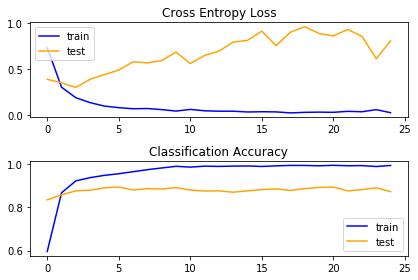

In [466]:
import sys
from matplotlib import pyplot
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
# plot diagnostic learning curves    
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.tight_layout()
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    
    pyplot.tight_layout()
    pyplot.legend()
    pyplot.show()
    pyplot.close()
summarize_diagnostics(history)

In [206]:
%matplotlib inline

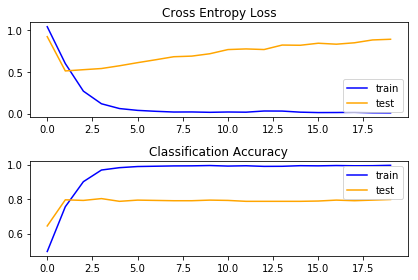

In [208]:
summarize_diagnostics(history)

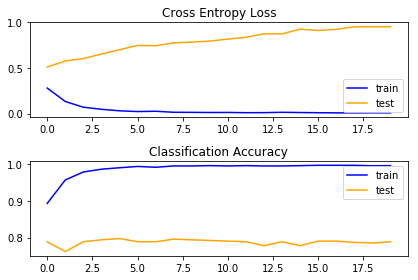

In [176]:
summarize_diagnostics(history)

In [137]:
model.save('ng_model_model_multiinput_NEW.h5')

In [138]:
model.predict([enc_docs,enc_docs,enc_docs])

array([[1.2176236e-01, 4.4611329e-04, 3.9009430e-07]], dtype=float32)

In [139]:
# load the model
from keras.models import load_model
# save the model
model.save('model_multi_nightingale.h5')
model = load_model('model_multi_nightingale.h5')

In [376]:
max_length

105

In [141]:
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX],to_categorical(y_train_docs), verbose=2)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX],to_categorical(y_test_docs), verbose=2)
print('Test Accuracy: %.2f' % (acc*100))

Train Accuracy: 99.51
Test Accuracy: 77.99


#### Build vocab with weights for embedding space generation

In [ ]:
import pandas as pd
import numpy as np
from numpy import   asarray,zeros
# load the whole embedding into memory
embeddings_index = dict()
# f = open('/home/surya/cs224n-Squad-Project/data/glove.6B.100d.txt')
f = open('/root/data/glove/glove.6B.300d.txt')


for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
vocab_size

In [ ]:
docs[0]

In [ ]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(clean_doc_voc)
vocab_size = len(t.word_index) + 1
vocab_size

In [ ]:
a = "0.41711,-0.10176,0.058147,-0.18332,-0.44458,-0.17852,-0.34392,-0.077147,0.58521,-0.52752,1.4831,0.9531,-0.027201,-0.31748,-0.23046,-0.24083,0.22548,-0.12685,-0.17578,-0.34924,0.5168,0.86818,-0.018579,1.2228,-0.52477,-0.26369,0.25925,-0.059529,0.27063,0.13036,-0.67677,0.48313,-0.16343,-0.069899,0.92846,-0.44196,-0.078755,0.5246,-0.59577,-0.1659,0.35194,0.30031,-0.50711,0.29111,-0.26332,-1.0523,-0.31061,-0.077155,-0.16019,0.26994,-1.1042,0.16292,0.79396,-0.77135,-0.95157,-0.55992,0.69163,0.021495,0.44292,-0.69881, 0.73889,-0.1064,-0.44058,0.17116,0.39109,0.043652, 1.2835,0.29026,0.51037,-0.19631,0.036696  -0.74017,-0.0035271 -0.54918,-0.25002,0.15853,0.71764,-0.28083, 0.42292,-0.89855,0.99665,-0.65188,-0.11919,-0.28617,-0.85273,0.55656,-0.23601,-0.43822,0.36317,0.45724, 0.38596,0.59233,1.4355,1.4563,1.1801,0.32987, 0.84998,-0.29444,-0.039114,0.39534".split(",")

a = np.array(a)
len(a)

In [ ]:
# embedding_matrix = zeros((vocab_size, 100))
embedding_matrix = zeros((vocab_size, 300))

for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
#     print((word,i),embedding_vector)
if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
# e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)

###  ADD USER DEFINED EMBEDDING FROM GLOVE 

In [ ]:
embedding_matrix.shape

In [ ]:
%timeit 
# np.isnan(data)[np.isnan(data) == False].size
np.isnan(embedding_matrix)[np.isnan(embedding_matrix) == False].size

In [ ]:
# t.word_index.items()

In [ ]:
# embedding_matrix
np.sum(~embedding_matrix.any(1))

In [ ]:
embedding_matrix

In [ ]:
# define the model
def define_model(vocab_size, max_length , custom_embed = True):
    model = Sequential()
#     model.add(Embedding(vocab_size, 100, input_length=max_length))
#     model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length , trainable=False))
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    print("Hello!!!!!!!!!")
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
#     model.layers[0].set_weights([embedding_matrix])
#     model.layers[0].trainable = False
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
#    #load different embedding file from Kaggle depending on which embedding 
#         #matrix we are going to experiment with
#         if typeToLoad=="glove":
#             EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
#             embed_size = 25
#         elif(typeToLoad=="word2vec"):
#             word2vecDict = word2vec.KeyedVectors.load_word2vec_format("../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary=True)
#             embed_size = 300
#         elif(typeToLoad=="fasttext"):
#             EMBEDDING_FILE='../input/fasttext/wiki.simple.vec'
#             embed_size = 300

#         if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
#             embeddings_index = dict()
#             #Transfer the embedding weights into a dictionary by iterating through every line of the file.
#             f = open(EMBEDDING_FILE)
#             for line in f:
#                 #split up line into an indexed array
#                 values = line.split()
#                 #first index is word
#                 word = values[0]
#                 #store the rest of the values in the array as a new array
#                 coefs = np.asarray(values[1:], dtype='float32')
#                 embeddings_index[word] = coefs #50 dimensions
#             f.close()
#             print('Loaded %s word vectors.' % len(embeddings_index))
#         else:
#             embeddings_index = dict()
#             for word in word2vecDict.wv.vocab:
#                 embeddings_index[word] = word2vecDict.word_vec(word)
#             print('Loaded %s word vectors.' % len(embeddings_index))
            
#         gc.collect()
#         #We get the mean and standard deviation of the embedding weights so that we could maintain the 
#         #same statistics for the rest of our own random generated weights. 
#         all_embs = np.stack(list(embeddings_index.values()))
#         emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
#         nb_words = len(tokenizer.word_index)
#         #We are going to set the embedding size to the pretrained dimension as we are replicating it.
#         #the size will be Number of Words in Vocab X Embedding Size
#         embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
#         gc.collect()

#         #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
#         #our own dictionary and loaded pretrained embedding. 
#         embeddedCount = 0
#         for word, i in tokenizer.word_index.items():
#             i-=1
#             #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
#             embedding_vector = embeddings_index.get(word)
#             #and store inside the embedding matrix that we will train later on.
#             if embedding_vector is not None: 
#                 embedding_matrix[i] = embedding_vector
#                 embeddedCount+=1
#         print('total embedded:',embeddedCount,'common words')
        
#         del(embeddings_index)
#         gc.collect()
        
#         #finally, return the embedding matrix
#         return embedding_matrix

In [ ]:
max_length

In [ ]:
model = define_model(vocab_size,max_length,True)
model.fit(Xtrain, to_categorical(y_train_docs), epochs=80, verbose=2, validation_split=0.1)

In [ ]:
model.metrics_names

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# # This tutorial is divided into the following parts:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 300)(inputs1)
#     embedding1 = Embedding(vocab_size,  300, weights=[embedding_matrix], trainable=False)(inputs1)
#         model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length , trainable=False))

    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 300)(inputs2)
#     embedding2 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 300)(inputs3)
#     embedding3 = Embedding(vocab_size, 100)(embedding3)
#     embedding3 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs3)

    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [ ]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)

In [ ]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], array(trainLabels), epochs=100, batch_size=16 , )

In [ ]:
keras_model = model
import tensorflow as tf

In [ ]:
! ls -ltr /home/surya/model_multi_nightingale.h5

In [ ]:
model.save("model_multi_nightingale_NEW.h5")

In [ ]:
test_data = "Hello John,How can I help to you I take toomuch coffe, with out coffee I feel headache Is it a throbbing headache? No How does bending forward affect your headache? I feel severing with out coffe How would you describe the intensity of your headache? sever headache with out coffee Do you become frustrated or upset easily?  I will sclod people near me Have you recently used any drugs in any form? No Do you experience day time sleep? restless Do you tend to drink alcohol heavily? I drink too much coffee Are you feeling agitated and physically restless? Feeling fatigued and lack of energy nearly every day."
test_data = "Hello John,How can I help to you severe headache and seizures Is it a throbbing headache? not at all How does bending forward affect your headache? severe pain at bothsides of my forehead How would you describe the intensity of your headache? it is worst, am not able to tolerate Do you become frustrated or upset easily? not all the times but some times Have you recently used any drugs in any form? being around smoke , certain smells bright light, such as sunlight, or flashing lights Do you experience day time sleep? In day time I feel sleepy, I will struggle to remain awake Do you tend to drink alcohol heavily? Yes, I tend to drink alcohol heavily? Are you feeling agitated and physically restless? especially lack of sleep I am  agitated"



enc_docs = encode_docs(tokenizer, max_length, [test_data])
enc_docs

In [ ]:
out = model.predict([enc_docs,enc_docs,enc_docs])
arr = out[0]
arr.argmax()

In [ ]:
!

In [ ]:
max_length

In [ ]:
# saved_model_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")


In [ ]:

!pwd

In [ ]:
with tf.keras.backend.get_session() as sess:
    tf.saved_model.simple_save(
        sess,
        "export_path",
        inputs={'input': keras_model.input},
        outputs={'output': keras_model.output})

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
keras.experimental.export_saved_model(model, '/home/surya/saved_model')


In [ ]:
# Export the model to a SavedModel
keras.experimental.export_saved_model(model, 'path_to_saved_model')

# Recreate the exact same model
new_model = keras.experimental.load_from_saved_model('path_to_saved_model')

# Check that the state is preserved
new_predictions = new_model.predict(x_test)
np.testing.assert_allclose(predictions, new_predictions, atol=1e-6)

# Note that the optimizer state is preserved as well:
# you can resume training where you left off.

In [ ]:


with mlflow.start_run() as run:
    mlflow.keras.log_model(model, "models")

In [ ]:
# model
mlflow.keras.save_model(model, "models_keras")

In [ ]:
>>> import mlflow
>>> # Build, compile, and train your model
>>> keras_model = ...
>>> keras_model_path = ...
>>> keras_model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
>>> results = keras_model.fit(
...     x_train, y_train, epochs=20, batch_size = 128, validation_data=(x_val, y_val))
... # Save the model as an MLflow Model
>>> mlflow.keras.save_model(keras_model, keras_model_path)

In [ ]:
# 20.5.2 Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
## Prepare iterator
it_data = datagen.flow(trainX, trainY, batch_size=64)
steps = int (trainX.shape[0]/64)

history = model.fit_generator(it_data,steps_per_epoch=steps,epochs=100, validation_data=(testX, testY))
